In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import gzip
import json
import string
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

## Perform sentimental analysis on the Elon-musk tweets

In [2]:
muskdf = pd.read_csv('Elon_musk.csv', encoding='latin-1',on_bad_lines='skip')

In [3]:
muskdf.head()

Unnamed: 0                                               Text
0           1                             @kunalb11 Im an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...

In [4]:
muskdf.head()

Unnamed: 0                                               Text
0           1                             @kunalb11 Im an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...

In [5]:
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sailo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sailo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def text_cleaner(text):
    text = text.lower() #lowercase 
    text = re.sub(r'https://t.co/\w+','',text,flags=re.MULTILINE) #removing links which start with https://t.co/
    text = re.sub(r'@\w+|\#','',text) #removing @ and # characters
    text = text.translate(str.maketrans('','',string.punctuation)) #removing puncutation characters
    text_tokens = word_tokenize(text) #tokenizing words
    filtered_text = [w for w in text_tokens if not w in my_stop_words] # removing stop words
    return " ".join(filtered_text)

In [7]:
muskdf.Text = muskdf['Text'].apply(text_cleaner)

In [8]:
muskdf = muskdf.drop_duplicates('Text')

In [9]:
muskdf = muskdf[['Text']]
muskdf

Text
0                                             im alien
1             ray tracing cyberpunk hdr nextlevel tried
2                                       great interview
3                                   doge underestimated
4     congratulations tesla china amazing execution ...
...                                                 ...
1994  true sounds surreal negative propaganda still ...
1995  make sure read ur terms amp conditions clickin...
1996                                     samwise gamgee
1997               altho dumb dumber u0001f525u0001f525
1998                          progress update august 28

[1675 rows x 1 columns]

In [10]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [11]:
muskdf['Text'] = muskdf['Text'].apply(lambda x : stemming(x))

In [12]:
muskdf.head()

Text
0                                          im alien
1          ray tracing cyberpunk hdr nextlevel tried
2                                    great interview
3                                doge underestimated
4  congratulations tesla china amazing execution ...

In [13]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:
muskdf['polarity'] = muskdf['Text'].apply(polarity)

In [15]:
muskdf.head(10)

Text  polarity
0                                          im alien -0.250000
1          ray tracing cyberpunk hdr nextlevel tried  0.000000
2                                    great interview  0.800000
3                                doge underestimated  0.000000
4  congratulations tesla china amazing execution ...  0.200000
5                                  happy new year ox  0.468182
6                 frodo underdoge thought would fail -0.500000
7                                        haha thanks  0.200000
8  indeed tweets definitely represent realworld t...  0.000000
9                        entertaining outcome likely  0.250000

In [16]:
def sentiment(label):
    if label < 0:
        return "Negative"
    elif label > 0:
        return "Positive"
    elif label == 0:
        return "Neutral"

In [17]:
muskdf['sentiment'] = muskdf['polarity'].apply(sentiment)

In [18]:
muskdf.head(10)

Text  polarity sentiment
0                                          im alien -0.250000  Negative
1          ray tracing cyberpunk hdr nextlevel tried  0.000000   Neutral
2                                    great interview  0.800000  Positive
3                                doge underestimated  0.000000   Neutral
4  congratulations tesla china amazing execution ...  0.200000  Positive
5                                  happy new year ox  0.468182  Positive
6                 frodo underdoge thought would fail -0.500000  Negative
7                                        haha thanks  0.200000  Positive
8  indeed tweets definitely represent realworld t...  0.000000   Neutral
9                        entertaining outcome likely  0.250000  Positive

<Axes: xlabel='sentiment', ylabel='count'>

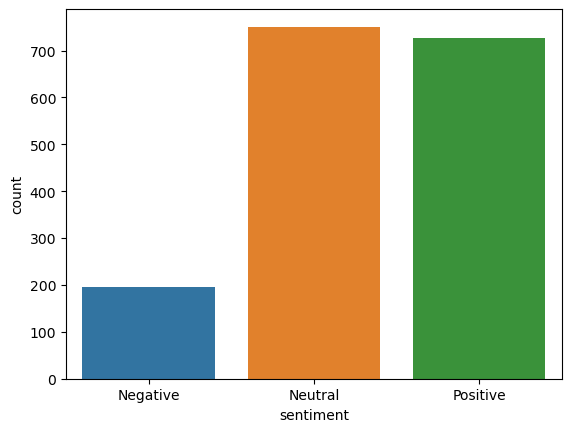

In [19]:
sns.countplot(x='sentiment',data=muskdf)

Added this below stopwords after analysing the highest unnecessary words using wordclouds

In [20]:
stopwords = STOPWORDS
stopwords.add('amp')
stopwords.add('rt')
stopwords.add('s')
stopwords.add('tesla')
stopwords.add('spacex')
stopwords.add('space')
stopwords.add('launch')
stopwords.add('year')

In [21]:
pos_tweets = muskdf[muskdf.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending=False)
pos_tweets.head()

Text  polarity sentiment
1836  impressive tianwen1 mars rover mission launche...       1.0  Positive
1298                                 lego movie awesome       1.0  Positive
1080                                one best shots ever       1.0  Positive
1723        mein herz brennt best boss battle song ever       1.0  Positive
340                 u0001f3a9 greatest gatsby u0001f3a9       1.0  Positive

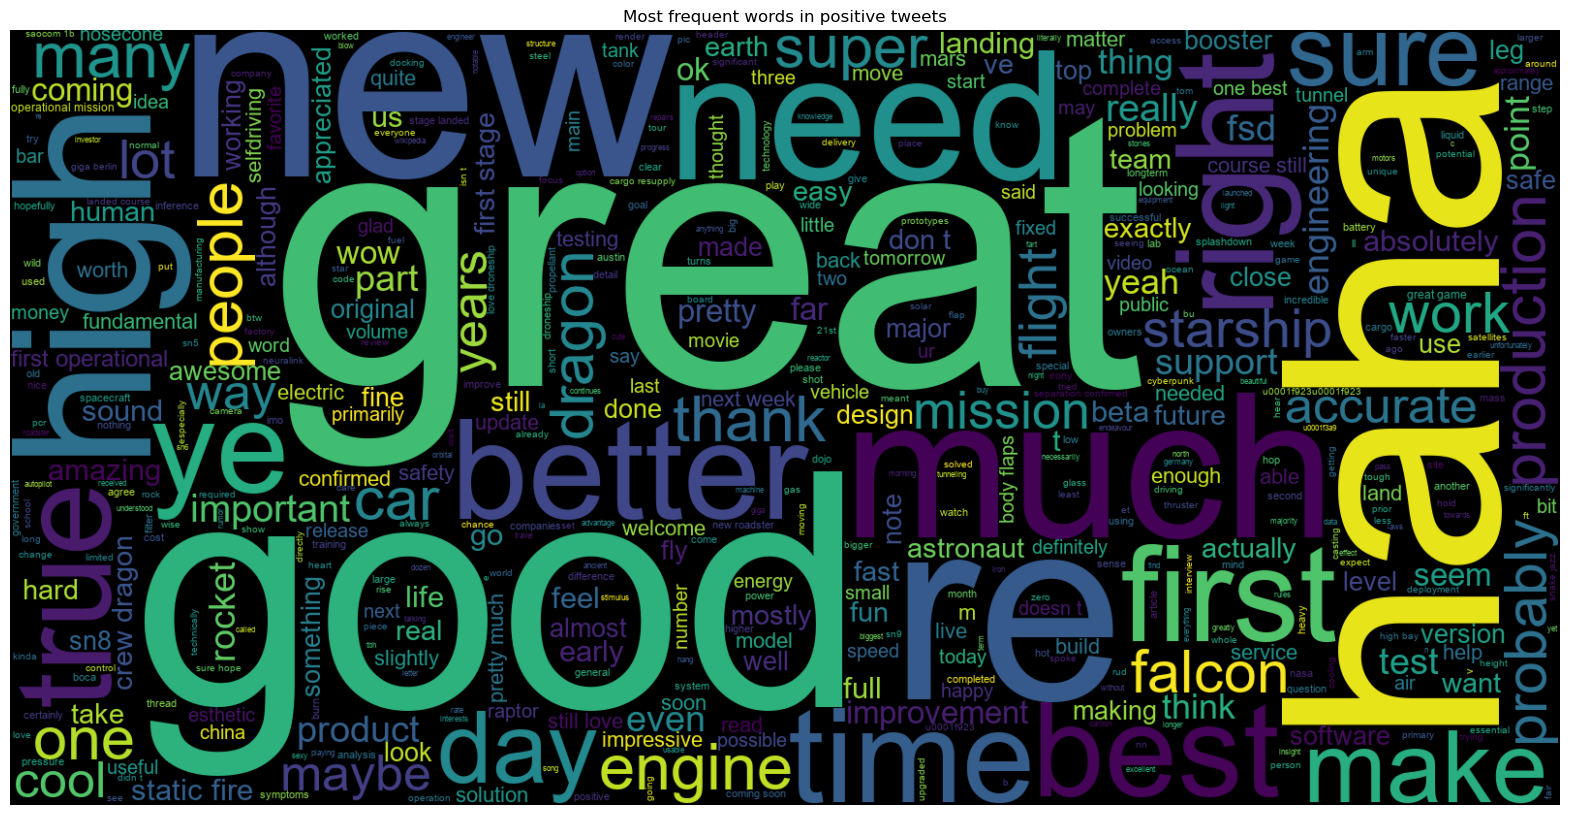

In [22]:
text = ' '.join([word for word in pos_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800,font_path="./arial.ttf",stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets')
plt.show()

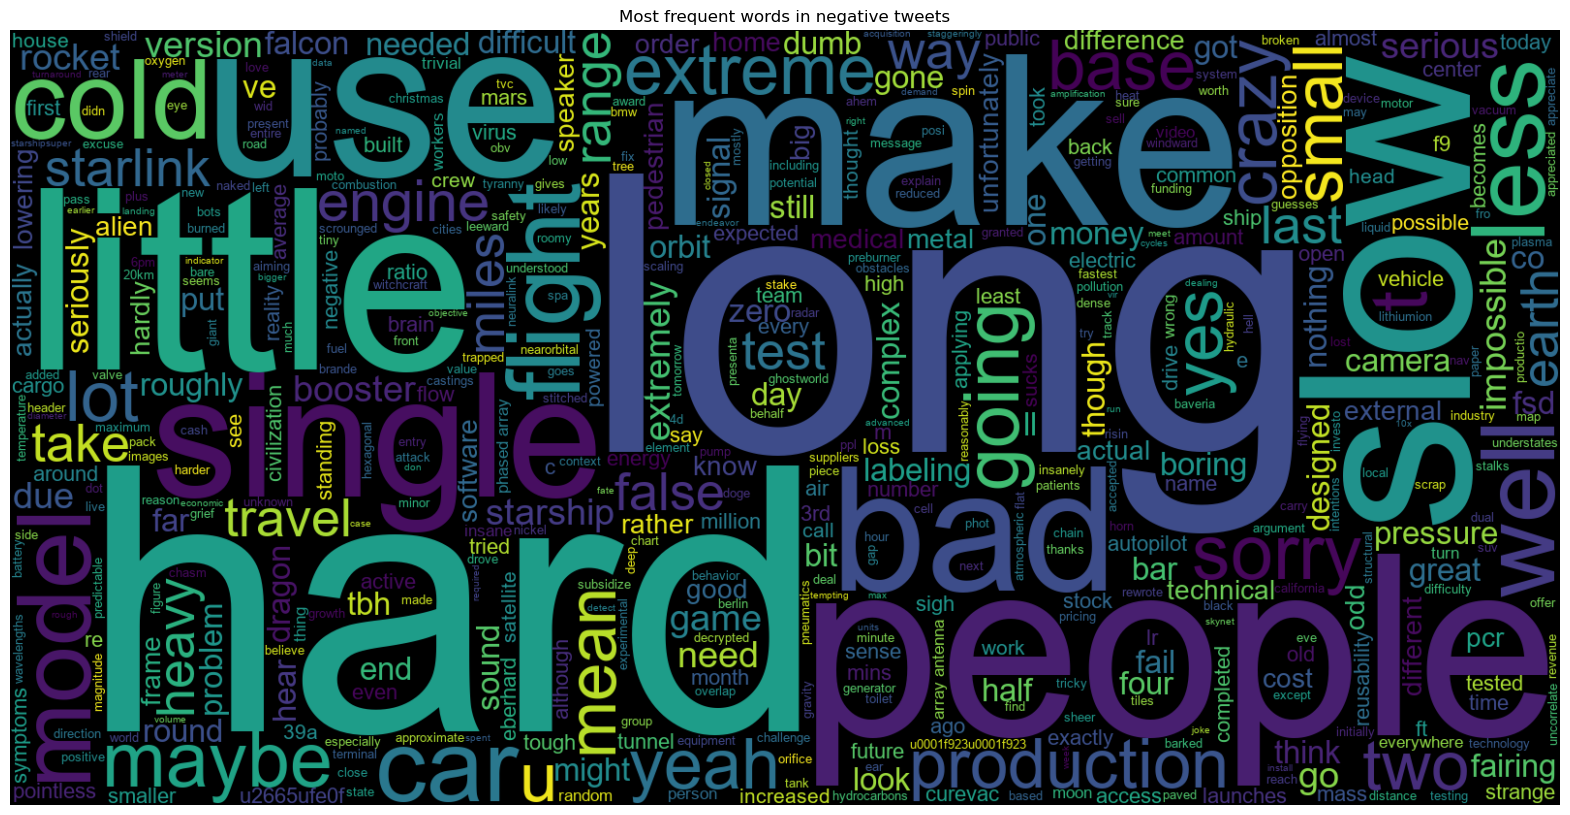

In [23]:
neg_tweets = muskdf[muskdf.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending=False)
neg_tweets.head()

text = ' '.join([word for word in neg_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800,font_path="./arial.ttf",stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets')
plt.show()

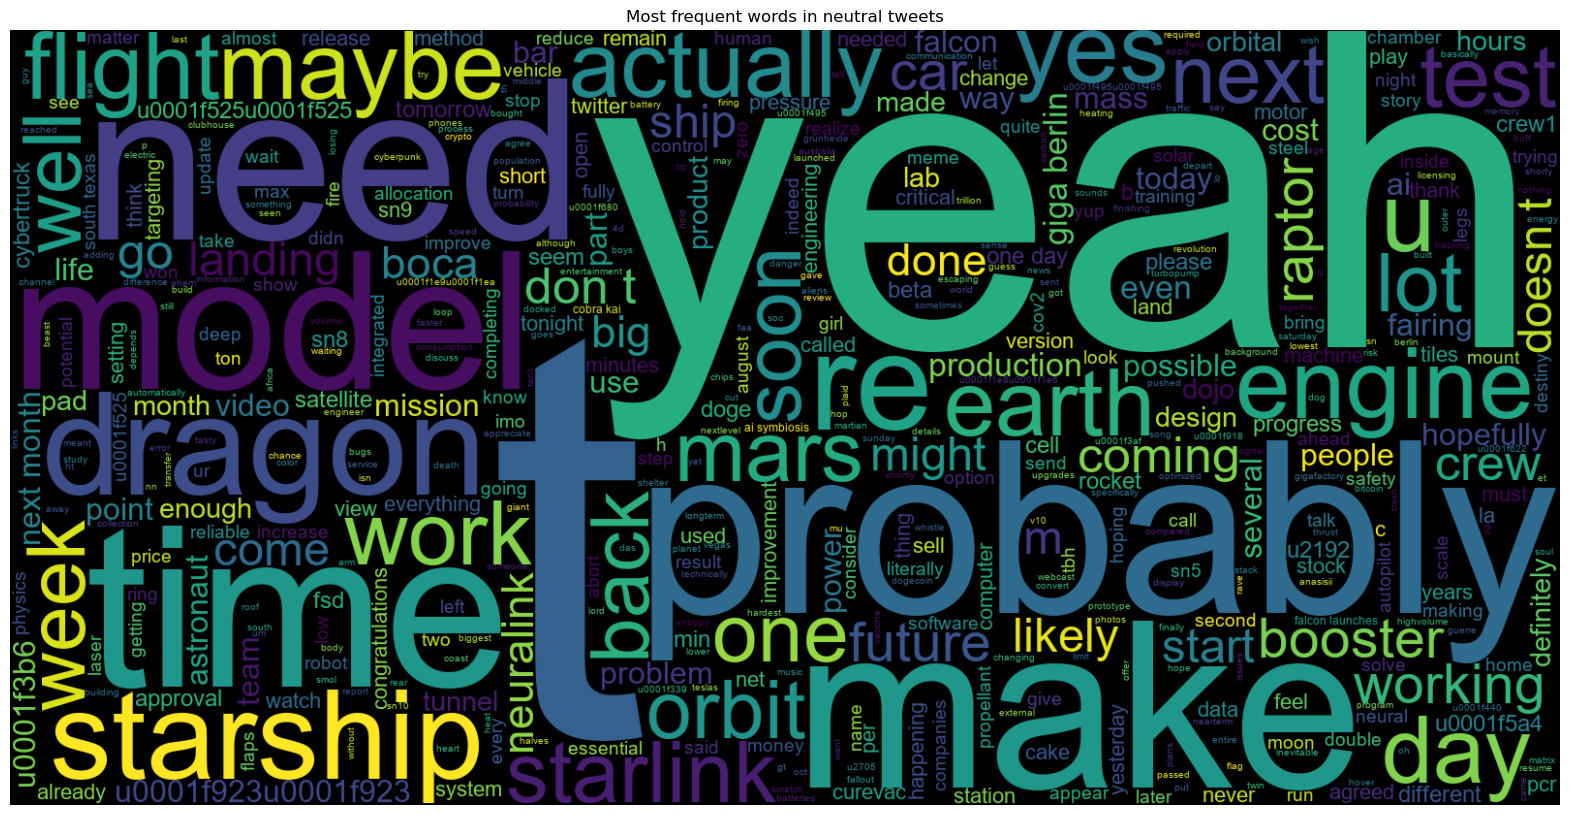

In [24]:
neutral_tweets = muskdf[muskdf.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending=False)
neutral_tweets.head()

text = ' '.join([word for word in neutral_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800,font_path="./arial.ttf",stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets')
plt.show()

## Extract reviews of any product from ecommerce website like amazon

In [25]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

videoGames = getDF('Video_Games_5.json.gz')

In [26]:
videoGames.head()

overall  verified   reviewTime      reviewerID        asin  \
0      5.0      True  10 17, 2015  A1HP7NVNPFMA4N  0700026657   
1      4.0     False  07 27, 2015  A1JGAP0185YJI6  0700026657   
2      3.0      True  02 23, 2015  A1YJWEXHQBWK2B  0700026657   
3      2.0      True  02 20, 2015  A2204E1TH211HT  0700026657   
4      5.0      True  12 25, 2014  A2RF5B5H74JLPE  0700026657   

        reviewerName                                         reviewText  \
0        Ambrosia075  This game is a bit hard to get the hang of, bu...   
1             travis  I played it a while but it was alright. The st...   
2  Vincent G. Mezera                                           ok game.   
3         Grandma KR  found the game a bit too complicated, not what...   
4                jon  great game, I love it and have played it since...   

                                       summary  unixReviewTime vote style  \
0                  but when you do it's great.      1445040000  NaN   NaN   
1  But in spite of that it was fun, I liked it      1437955200  NaN   NaN   
2                                  Three Stars      1424649600  NaN   NaN   
3                                    Two Stars      1424390400  NaN   NaN   
4                               love this game      1419465600  NaN   NaN   

  image  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

In [27]:
videoGames = videoGames[videoGames['verified'] == True]

In [28]:
videoGames.drop(columns=['verified','reviewTime','reviewerID','asin','reviewerName','summary','unixReviewTime','vote','style','image'],inplace=True)

In [29]:
videoGames.head()

overall                                         reviewText
0      5.0  This game is a bit hard to get the hang of, bu...
2      3.0                                           ok game.
3      2.0  found the game a bit too complicated, not what...
4      5.0  great game, I love it and have played it since...
5      4.0  i liked a lot some time that i haven't play a ...

In [30]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332645 entries, 0 to 497576
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     332645 non-null  float64
 1   reviewText  332504 non-null  object 
dtypes: float64(1), object(1)
memory usage: 7.6+ MB


In [31]:
videoGames = videoGames.dropna()

In [32]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332504 entries, 0 to 497576
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     332504 non-null  float64
 1   reviewText  332504 non-null  object 
dtypes: float64(1), object(1)
memory usage: 7.6+ MB


In [33]:
videoGames = videoGames.drop_duplicates()

In [34]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254197 entries, 0 to 497576
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     254197 non-null  float64
 1   reviewText  254197 non-null  object 
dtypes: float64(1), object(1)
memory usage: 5.8+ MB


Considering only till 3000 rows for performance constraints

In [35]:
videoGames = videoGames.iloc[:3000,:]

In [36]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 8407
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   overall     3000 non-null   float64
 1   reviewText  3000 non-null   object 
dtypes: float64(1), object(1)
memory usage: 70.3+ KB


In [37]:
videoGames = videoGames[['reviewText']]

In [38]:
videoGames.head()

reviewText
0  This game is a bit hard to get the hang of, bu...
2                                           ok game.
3  found the game a bit too complicated, not what...
4  great game, I love it and have played it since...
5  i liked a lot some time that i haven't play a ...

In [39]:
from nltk.corpus import stopwords

In [40]:
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sailo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sailo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
def text_cleaner(text):
    text = text.lower() #lowercase 
    text = text.translate(str.maketrans('','',string.punctuation)) #removing puncutation characters
    text_tokens = word_tokenize(text) #tokenizing words
    filtered_text = [w for w in text_tokens if not w in my_stop_words] # removing stop words
    return " ".join(filtered_text)

In [42]:
videoGames.reviewText = videoGames['reviewText'].apply(text_cleaner)

In [43]:
vglst = [x.strip() for x in videoGames.reviewText]

In [44]:
vglst[0:14]

['game bit hard get hang great',
 'ok game',
 'found game bit complicated expected played 1602 1503 1701',
 'great game love played since arrived',
 'liked lot time havent play wonderfull game simply funny game verry good game',
 'bought game thinking would pretty cool might play week two done boy wrong moment finally got gamed fired commentors right takes forever u forced create account watched booted could tell right bat alot thought went making game ever played sim city game must try easily navigate thru multi layers playing htis month straight still discovering layers complexity game things game could used tweaked 5 star game',
 'played old anno 1701 1503 game looks great complex previous versions game found lot things lacking sources power inability store energy batteries regenertive fuel cells buildings game need power trade main beef requires internet connection wonderful artistry graphics anno 1701 set future world global warmming flood land resource scarcity sent human kind lo

In [45]:
from spacy import displacy

In [46]:
nlp = spacy.load('en_core_web_sm')

one_block = vglst[6]
doc_block = nlp(one_block)
displacy.render(doc_block, style='ent', jupyter=True)

Let's now try to take the parts of speech for the words

In [47]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [48]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [49]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [50]:
videoGames['sentiment_value'] = videoGames['reviewText'].apply(calculate_sentiment)
videoGames

game bit hard get hang great
ok game
found game bit complicated expected played 1602 1503 1701
great game love played since arrived
liked lot time havent play wonderfull game simply funny game verry good game
bought game thinking would pretty cool might play week two done boy wrong moment finally got gamed fired commentors right takes forever u forced create account watched booted could tell right bat alot thought went making game ever played sim city game must try easily navigate thru multi layers playing htis month straight still discovering layers complexity game things game could used tweaked 5 star game
played old anno 1701 1503 game looks great complex previous versions game found lot things lacking sources power inability store energy batteries regenertive fuel cells buildings game need power trade main beef requires internet connection wonderful artistry graphics anno 1701 set future world global warmming flood land resource scarcity sent human kind look deep ocean valuable min

metal bookmark couple weird flaws wish cloth maps included books individually included set worth losing get cool set
awesome
glad got collection
nicely put together crisp clean good detail
box perfect condition books awesome great details must every zelda collector
amazing value believe set available price everything packaging quality paper stellar set feels like put together care mind also worth noting fact ocarina time guide found set criticism cloth maps included twilight princess wind waker still im happy purchase
starting collectingthis one best item get
great set guides shipping damage books great shape misprints upsidedown pageswell worth investment
im huge zelda fan im happy add collection
bought future investingcollecting paper included isnt personally signed guyits copy actually dropped price 40 last 9 months since purchased
happy purchase
div idvideoblockrq6p1t4no5ild classasection aspacingsmall aspacingtopmini videoblockdivinput typehidden name valuehttpsimagesnasslimagesam

sometimes go wack clapping parts song show uplike hit doesnt register matter hard smack game doesnt register singing onkey know fact works great
much delay sensitivity microphone rb4 ps4 makes unplayable
works really well ive hasnt broken
great
didnt work xbox one rockband sure blame obama
works well wii guitar hero games well dance
works great
nice
microphone unbelievably good studioquality simply find mic good less 50 problem trying get mic stand since doesnt screw even wasnt hard overcome
great replacement mic rockband always hard time tapping portion game oem picked taps perfectly 100 score singing cowbell anyone
awful controller tamborine slaps rock band 4 dont register went official mic things much better
works great sounds great
bought use band hero voice games xbox 360 worked well plugged xbox 360 without issues microphone worked properly seller described voice heard clearly able play games usuing mic great deal price would recommend
got use rockband ps4 works
works well part t

son sayes still learning customize levels trouble changing ships liked 2006 better easier use get read book
got first kind tedious added weather well titanic hurricane hoot got 08 cause laptop horridly slow get hands computer power im going get ship simulator extremes tube gives good idea expect check see
got ship simulator tried install confusing 1 day later install time work time play guess didnt went sucks oo
game good way getting helm rms titanic well satisfied hope decied ot buy also enjoy
graphics arent good ship shore radio distorted accented impossible understand said game fun looking ocean going version microsoft flight simulator isnt lousy game great game okay
made controller easier grab easier hold comfortable hands overall would buy cheap great addition controller
ive bought slip right unless get one obvious defect last years must afraid kids messing controllers maybe get lol
put controllers would like get wear tear great buy amazing
bought amazon seller likeelectronic ship

excelent product
better presentation would five
good
great
daughter found old ps2 game system youngest son didnt one two games memory cards etc found needed amazon
good memory card good saving memory like lost one got one buy recommened
cards allow save large amount downloads compatable ps2 rock
glad purchase 128mb memory card recommended amazon another gamer
daughter still loves play station needed bigger memory card couple games searched amazon found order
cam quick works like new everything expected plus cheap
memory card unleashed games start dont stop gameplay awe yeah lets get lunch save gameplay holds well saves loads reliably card save games
huge memory ps2 great save games save money
works great suggest anyone great price well overall im happy purchase
old fat ps2 far problems memory card inexpensive lots storage space great buy
much say item except suppose stores lot games
want play ps2 games needed memory card fits bill fine hold many games buy able games
great little cards 

replaced cheap one another cheap one different manufacturer result inserting wires heard cracking noise nothing visible working grandson wears one doubt ill spend little next game switch box
problems plugged sons old sd tv one av input works fine threee different connections going trouble switching cheap easy fix old tv
exactly needed wii ps3 needed switch well connectors well labeled gave tight fit switch big well marked really like 6 yr old works great complaint product id buy another thing consider placement would liked connections one side maybe tv bottom shelf wires visible easy hide behind something
theres enough plugs consoles solution seen ones nice one costed way happy found
bought hdtv one svideoav input rest hdmidviaudiopcusb inputs seeing though like play game consoles dreamcast n64 wii ive decided buy hook consoles av selection works nicely switch thats device highly recommended
wish buy thing gets way time cables everywhere dropped thing cracked middle recommend radioshac

charger name brand worked would buy needed need four words
bought old game boy micro internet ordered charger separate worried would work fully charged unit within hour great product
forsaken 64 one games never heard play anyways find awesome game singleplayer intense multiplayer crazier game sixdegrees freedom shoot upsidedown sideways etc singleplayer tons missions get one setting never actually figured save game figure eventually multiplayer either play bots friends game supports 4player multiplayer even thought sadly ive played one person multiplayer game like deadlier version hide seek maps big one thing like playing bots able play splitscreen like 3 people room overall game great definite buy every n64 fan
boring game graphics average 64 graphics many 64 games time dull textures even though game neat aspect movement every direction still lacks fun gameplay music annoying heard better snes system quality wise dont reccomend game even collector
one kind game classic kenji
game work

thank youwonderfuland trusting product seller recommend word word word word word word many words required almost doneand done
sequel popular tekken tekken 2 takes everything original expands upon characters levels moves tekken 2 classic library fighting game lover combat tekken one best ever many possible combinations almost impossible remember tekken gets better better another thing love game music suits stages characters well
goes tekken 2 played never owned im officially best tekken player period urge even first 2 consumed
cd worked 4 days thenbam skipping like crazy froze wen picked jack2 kunimitsuand wont come pretty crappy copy
love ryu love wolverine ryu invented fire ball goku goku could suuuuper juuump throoow fire balls fire balls bring second character fire power
thanks
described
thanks lot great product service
game classic dont remember graphic bad used play kid controller weird today standards thing like game adventure part discover new areas see pass game graphic control

thank game good condition increased collection games one
label torn cartridge theyre different came manilla envelope game 1010
although probably first say disc self perfect condition satisfied picture led believe would get game disc case manual received disc maybe assumed much read description better picture self misleading read fine print seller
works fine old school way huge improvement twisted metal ii still old school graphics still fun play
believe twisted metal game purchase fun exiting fundamentals throughout games seek enemy kill move next level cool thing using cars blow things getting destroy others also levels locations reconciles adds fun like twisted metal 3 brought 3d look cheaters locations car weapons added new cheaters story well embellish story line yes graphics however game play part stood true twisted metal franchise created beginning love twisted meat love one played twisted metal games part like one really like much
lot people dismiss game different developers per

never played kid decided purchase classic game im trying build personal ps1 collection
game freakin fun especially 4player cheats probably favorite n64 game never loses replay value
remember playing multiplayer tournaments younger still play son
share great relationship game came received promotional vhs tape mail told game stages gameplay better instruction manual booklet also love footage taken beta version game promotional montage could tell also back going make conkers game another cartoony adventure rather adultoriented one ended making anyway game fantastic perfect supplement super mario 64 ways actually better kid used cheats fun explore played enough times 100 game two hours gamefaqs started thing used lesserknown cheats get ice key secret eggs like old days collecting stuff game get
enjoying playing game complaints met expectations would business seller
purchased game nostalgia case lol worked fine would buy another one failed
game based movie hit spot playing levels fun perfe

game fantastic personally love ever played game evil witch ugly wants evil steals beautiful girl named tooty try transfer beauty ugly witch also ever played game bear bird collect golden puzzle pieces musical notes dinosaurs mixed teddy bears named jinjos also ever played game shaman transforms bear bird various forms well havent start game perfect ages would recommend game anyone n64
classic
like game
rare extraordinary knack making great games banjo kazooie released 1998 considered classic since must agree well deserved honor well find game fantastic well ill explain review first lets talk banjo kazooies story banjos sister tooty kidnapped wicked witch gruntilda gruntilda planned swapping tootys beauty banjo friend kazooie help okay seriously story pretty lame hey game opinion matter good graphics great story boils one thing thats gameplay banjo kazooie fantastic gameplay banjo kazooie play banjo andwellkazooie kazooie stays inside banjos backpack times shes useless work team learn m

fans oldschool dungeon crawler snap game similar style games time assume roll monster hunter mission climb mysterious tower following fathers footsteps may say graphics dated feel nostalgic randomlygenerated dungeons spelunking always grand adventure musthave rpg lover
horriblegame broken
tank
went well
disc scratched wont play properly sons ps3
everything ok
last mainline crash game ps1 similar style crash 2 added vehicle segments
got faster expected works great nostalgia kicked wonderful sure noted slight crack case nonetheless awesome
runs perfectly great condition
great deal
bought son hes happy
works
lie great
im glad able buy game great price really enjoyed reliving childhood
three years bought game children still play every weekend clearly winner books
used play game grandma favorite crash series exactly remember complaints fast delivery
played game fun came amazon order another copy game could go back time enjoy classic game however bought seller warehouse deals inc get game pl

works perfect
graphics stunk banjo kazooie better
good newer 3ds version better
looks works perfect cartridge rattle
works perfect received 3 days
worked great
game made 3d goal moving right platformers super mario 64 first 3d platformer 19 years still plays fantastically anyone n64 needs game best selling n64 game reason
awsome
oh good old days playing mario 64still play time time game arrived great condition
great condition works great
fun game play
5 star review n64 version liked pc version ok somehow weird backward move believe nintendo actually fixed game probably minority comment many hardened id fans would vehemently disagree statement fun times n64
game arrived time worked great problem isnt good game quake ii game played deathmatch ps1 analog sticks want play old school fps deathmatch try ps1 version make sure 4 duelshocks multitap
game long ago forced pawn love recommend anyone interested old doom style first person shooters awesome game
enjoy game
amazing game somewhat easy 

game came time works game pretty bad opinion would stick 2d whipping action looking fun choose 2 pretty lame characters camera angles good gameplay self great get game add collection game waste energy
classic many reasons one first major releases fps genre looks feels like pc version least memory fun always remembered
password feature graphics lacking ps1 era saving game original pc version 2 copies well doom 64 doom 2 doom 3 saving features teatures gradient reminiescent old 3d maze screensavers older windows machines graphics could smoothed bit games ps1 library better graphics original dos version doom better graphics controls responsive fluid music damn awesome game comes special padded longbox gameplay fun repetitive due password system sucks level design excellent postives neagtives regardring doom ps1 negatives major screwups irritate great game recommend buying port go play doom atm something doom atm httpsyoutubed0rstdhowagt7m16s
great play doom nice controller instead keyboar

great copy
tm1 must ps1 enthusiast ever owned ps life spend bucks takes get copy twisted metal travel back enjoy one best ps titles ever
top 5 greatest game ever
bit harder remember controls rather awkward takes bit getting used also cant use analog setup
always wanted game since first came must classic never long play fun graphics great time came fun play another person looking shooting games like car must
like old playstation games one favorite series would recommend anyone likes twisted metal series
game started love vehicular combat definitely get game love one twisted metal 2 kid
ive played twisted metals 3 4 first two games seriestwisted metal 4 cheats unlock bosses like sweet tooth minion etc
excellent sale
good original copy
love
classic old school classic
dint get game almost year ago still find pretty fun tiny roster ten guys extremely outdated recognized guys several among favorite wrestlers one completely unfamiliar ahmed johnson think graphics really good although wrestler

one greatest games times ands buts granddaddy comes survival horror yes alone dark uninvited sweet home came first went nowhere kick started entire genre love version game best even remake 3 options gameplay original beginner arranged arranged awesome arranges locations many items game much like 2nd quest first zelda game voice acting legendary graphics awesome forget live video beginning ending game girl played jill absolutely beautiful game hard one bites puts orange caution youre jill arranged anyway ammunition limited start game thats makes great cant run around blasting things wonderful many easter eggs little things find game look good walkthrough trouble finding give game good bit replay value highly recommend want good game fact dont get much better
awesome game brings back many memories
probably best mortal kombat game ever
blow cartridge lot first got run smoothly need remember play
box didnt expect anyway works perfectly
bad
weird controls weird ok
amazon seller sold game th

great classic grew playing spyro games takes back whenever play works great
although description claim little scratched works well actually rough time recognized playstation console take tries get going works well got quick enjoyed playing
works well thank
happy play game highly recommend spyro fans want play spyro series good became lame games skylanders series quality end legend spyro trilogy must
game took quite tries get got played heck one faves 2nd third part wish someone could tell go getting gems u defeat cortex first part got
came time works great
love game much reminds childhood played little bit got love classic style game overall cant go wrong classic ps1 game
used play time little graphic quality low first one still love game
product arrived far sooner expected arrived great condition save scratches disc aside little scratch two game plays perfectly well remember good old days back game developers focused structure game graphics fancy sh like back 90 games time good simple

begin id like touch fact game arrived quickly door within 3 days ordering pleasant disk completely unscathed enormous plus cd case intact cover art wasnt faded torn like new love okay enormous fan spyro years since childhood spyro dragon first ever 3d platformer action adventure game ever played titles like n64s mario 64 ocarina time came afterwards spyro holds special place heart good reason game grand quality game play fluent fun visuals time still vibrant color enemies well varied pleasure experience start finish well theres bonus room thats super fun wont spoil whats though downside id say boss monsters arent well built overly difficult still fun rather short however thats literally complaint muster game wonderful game would highly recommend friends one asked
know old game definitely classic eventually kids nieces nephews grow little older ill introduce classic games one best ps1 games
game played granddaughter loves game fun watch well good game kids
unless still ps 1 like game su

brings back childhood like idea collecting stars coins star bank love buying items minigames
cart functional came pictured great game inciting fist fights destroying friendships ages would recommend anyone looking end unsavory relationship
original mario party must previous mentioned title retro gamer collector classics played mario party 8 9 wii see humble beginnings popular series hit family games unlike mario party 8 somewhat interesting storyline six famous characters mushroom kingdom mario luigi peach yoshi dk wario arguing could super star rather amusing argument sequence six placated toad play variety games order achieve good deeds become super star held comparison boards mario party 8 9 wii boards mario party 1 still holding well naturally graphics incredibly dated design tad intricate focuses gameplay instead visual style rules board also three players move around board predetermined amount turns play addictive fun minigames collect coins hopefully star two try run bowser caus

kid cousin would never let play newest game play sega genesis sold got felt love game game self straight forward fun many things come see kid evident game easy ais lock start damage time lock could easyly aim heads kill graphics looks like bunch blocks put together character models personal taste makes game hilarious many glitches notice along way arent really game breaking even problems gameplay amazing psone game defenetly good game
arrived timely manner great condition problems game thoroughly enjoyed playing recommended grew ps1
one classics syphon filter 2 loved game 12 years ago wanted buy play fantastic rollings weapons great game
original syphon filter trilogy set standard arcade style military third person shooter generation console whether youre old school collector someone thats looking properly emulate old school games pc game one every good boy girl
syphon filter awesome game pretty advance stealth reminded mg splinter cell wish would remake others ps3 updated graphics
wor

nintendo 64 memory expansion pak upgrade vital part terms plugging playing many great titles already released console titles absolutely require upgrade legend zelda majoras mask donkey kong 64 two titles example accessed without upgrade perfect dark one title offers minimal gameplay locks players many richer features due lack available memory run features properly think youll find even donkey kong 64 perfect dark zelda majoras mask isnt thing youll still wanting consider purchasing ram expansion key reasons 1improved gameplay details lot games weather know offer fine gameplay oriented details available without extended memory games capable improved framerate improves quality onscreen action prevents slow effects lot screen action occuring example programers implement textures details environments characters making things look lively life like ai artificial intelligence improved become smarter 2 second drastic improvement audiovisual quality people dont understand computer games really 

authentic game obviously perfection wonder games stuck around long warned order games amazon dont always know youll get mail second attempt got lucky found seller authentic game tell first hand worth im even upset first attempt game good play havent already youll understand many people bought still buy love
works great thank
truly classic game grew playing pokemon dont hesitate pick copy pokemon red blue gameboy color found pretty cheap used go attic get sure emulate games phone experience isnt actual nintendo hardware provide overwhelming onset nostalgia youll feel kid far game redblue flagship gameboy games become classics every sense term incredible much fun adventure could packed cartridge little onboard memory purchase one swap save battery get cr2025 theyre cheap easy replace dont worry use tape need soldering youll playing hours hours come youll find humming old town themes battle soundtracks game wonderful wont regret spending 30 bucks best buy values likely increase time
90s k

one best games ever 8 worlds well side games play luigi vs boo find yoshi toad fortunes etc gameboy color printer print mario symbols black white love game
exactly thought would
super mario bros made nintendo today levels original couldnt finish game well super mario delxue saves started last mean fans dreaming game plus got mine cheaper classic nes game get game something new youll get used
happy recommend
good product works perfectly problem stickers back part box thats devaluate product
excellent product 1010
expected
ordered product sunday took 4 days arrive buying options section saw sign said good ordered came description oh way order unlock luigi must go first save file hit start say copy copy save file go copied save file hit start go clear hit select button itll say erase data data deleted erase data get play luigi yeah anyway seller got sosa games also really fun game also hard anyway recommend game whoever buying gameboy color one
purchased lime green gb color sosa games use

streetfighter must streetfighter fan everywhere day ps1 streetfighter old school love title come complete unlockable features alpha combos
people read title think must talking game third game alpha series called review third copy alpha 3 lol alpha anthology first got alpha 3 max psp get game simply put arcade stick want play ps3 buy order game plays like dream looks great impressed well ps1 handled game looks like anthology version would assume best hardward advanced really tell difference two load times existing version one ima keep brief like street fighter need really needs game capcom puts online dont know much cry one time greats capcom vs snk 2 great 2d games era fun bright viberant one best sf games ever made period
defective product microsoft made sticks back olden days computers game ports stopped making brought back production time computers longer came game ports supplied stick ubs adapter unique product standard ubs adapter work seller include adapter box claimed lying flie

entire ape escape series amazing graphics good original ps gameplay fantastic im pressed time give game 9510
youre trying build classic ps1 collection make sure include wonderful lil platformer may quality crash bandicoot many games live series
say catching bad monkeys net fun starts impressive first levels dont let fool gets much better easily favorite platformer ps1
many years ago played game demo station wished gotten ps instead n64 recently gotten ps1 memory card ps2 decided get game much wanted started game hasnt aged well full good ideas originality draw distance pitiful really diminishes sense exploration sticks outmoded design conventions youre interested videogame history however fascinating game shows early attempts made justify two analog sticks
great game younger still better 2 3 buy
lot fun trying cath monkiesplusi love characteristicslike misses girlfriend likes meditate
fun
doesnt like duke nukem f said dont better put halo call duty destiny etc game well doom original f

happy
works great described completely greatest hits side everything works great came really fast really good product seller look
love ffvii favorite rpg bought old copy damaged replacement worked well much cheaper found game stores
one classic games find childhood really one best rpgs money could buy still look fanfare around game reason people still play talk game
saved allowance weeks buy game first game im adultunless ask wife game awesome graphics bit old storyline one best ever seen date
hasnt already said million times million people game good without question earned place among top 2 3 time rpgs date played many hundreds since game invested enough character story line character died dropped controller shock small tear may found way cheek game especially time release good enough interest found already page remarkably reading humble review tell isstop reading go buy itit damn good beware price though original black label version top 100 auctions collecting thing avoid scammers as

let get way came late final fantasy vii played final fantasy adventure original game boy kid ive grown gamer figured id better go back play classics ffvii near top every list could think review free nostalgia since didnt ever play game two months ago youre reading assume know basics rpg first 3d final fantasy et cetera im also going take granted realize game decade old liitle unfair compare todays games though aged remarkably well original playstation title play ps3 also available download psn ps2 able save ps2 ps1 memory card dont ps3 cant vouch saving capability youre tossed action moment start game becomes plot device later actually made wonder game would lacking kind noncharactermodel cutscenes soon proven wrong cutscenes beautiful even todays standards combat system uses whats called active time battle atb system decent blend turnbased realtime character time bar fills input command commands executed one time order chosen bars fill selection sometimes execution depending action gi

vendor quite something sent exactly asked resident evil 2 n64 port nearly half predicted shipping time normal shipping package cartridge though original game box anything aside scratches back labels dust main receptor perfect order couldnt possibly gone better
loved playing game like 10 11 bought college still good get older much easier beat making better play story modes
item arrived time described worked well five stars
wish would remake new consoles original game amazing looks terrible 60 television good game
really rate wrong game system
item described pleasure business
works
awesome game enjoyed years ago kid still really fun opinion cant explain whole game fun enjoyable id recommend
great condition exactly wanted even came orginal case artwork classic game definitely let relive childhood help share experiences children
excellent
yellow dot eats lots smaller dots debuts first 3d platforming adventure controls nice friendly visuals pretty gameplay bunch jumping bopping enemies orig

say many things dreamcast even play games battery messed poked reader get games working replaced battery together holder got working dreamcast
excellent
sega dreamcast work fine im able play old dreamcast game still
believe console failed large promising library games thing flunk received minimal wear wiped use looked good new
glad could revisit old games
never failed yet beaten games got still works like new
still works
system allowed reexperience much fun years ago resident evil games shenmue railroad tycoon 2 games great piece hardware powers love ease organizing game files visual memory units way time date settings remained accurate long time periods even system unplugged really worth
never got great system graphics like ps4 sbox done love games
console today still great many games console still easily find day still compatible modern televisions thanks svideo capability console classic also many hidden gems really go wikipedia article start drool vmu capability four ports controll

like direction sega took memory cards time really thought future controllers memory cards mightve half right guess would give item five star werent one thing really dont blame sega uses lithium battery reason mine always seemed die even noticed bad sega good ideas harder execute time
great item love visual memory unit first visual memory card
purchased husband one damaged flood home kept almost new condition always wrapped purchased one hoping cheer losing took weeks get wasnt shipped 1 week inquired lod dirtier described spent 1 hr cleaning happy get disappointed shipping condition
replacement original broken since used often much
nice game fun easy play overall rating 39 stars nice game fun easy play overall rating 39 stars nice game fun easy play overall rating 39 stars nice game fun easy play overall rating 39 stars nice game fun easy play overall rating 39 stars nice game fun easy play overall rating 39 stars nice game fun easy play overall rating 39 stars nice game fun easy play 

great classic loved playing child get hands another copy dont regret purchase noticeable difference version ps1 version content graphics basis game play character class wizard archer warrior guy axe forgot class name sorry customize via colors name really fun since class set strengths weakness main thing collect rune stones fight bad guys restore every thing back way boss monsters really cool
love game plays good good shape previous owner took good care
remembered game like ten years ago didnt remembered name finally stumbled upon bought right away memories came back great play family friends recommend like adventure puzzle solving button smashing though countless enemies using great team work
looking nostalgic experience nothing better baby playing 4 players like old days friends really bring back great childhood memories came used worked normally game load screen turn sure blow inside cartilage good quality quick delivery
game much replay value used rent game time never got buy kid i

far one addictive games ever released much like predecesor dk2 addictive funny perfect every way best thing dk1 dark sense humor perfect much like first cursing anything narrator little cutscences everything perfect dark humor theme game definitely best strategy game time non stop action lots replay value skirmish multiplayer rounds package part collection like rts games
waited quite dungeon keeper 2 come bought immediately one hand great sequel people played dk1 easily able pick moving units building rooms lining corridors traps graphics better sense theyre geared towards future development instead pixelbased graphics creatures rooms drawn polygons makes monsters look clumsy mean future graphics much smoother cleaner going dungeon possessing creature cause creatures turn cloud dots rooms roam still crisp easy see roaming dungeons one true pleasures game extra rooms youd hoped much sequel took long make casino neat jackpotwinning minion starts dancing singing wins disco inferno rooms b

house dead 2 one top ten sega dreamcast games hands first ever played house dead sega saturn loved know youll absolutely love thotd2 game informer ranked 99 best games times wow back day bought game 1999 thirdparty light guns could dreamcast first played game used hand controller kill zombies harder hell fun year later got mad catz dream blaster boy howdies make game great auto reload automatic rapidfire along standard fire option great gun hotd2 horrer themed onrail light gun shooter still blast playing even today yeah yeah know graphics arent par todays games game simply put rocks great gameplay always important eye candy books thotd2 certainly easy cake walk powerups help automatic weapon good time taking thotd2 continuation first one saturn youre blasting way across waterways venice central plaza roman colosseum goldmans tower caleb goldman man funded dr curien making evil creations curien mansion incident first game pay attention goldman resurrected magician main boss 1 hes bigger

think games overhyped
arrived safe sound great bargain exactly game expected fascinating
box scratches bents everything else fine
super fun works windows 7
plays windows 7 played lost disk decide buy
product exactly described
game good today first played long ago higher end system problem running think must cheat codes built games still fun play grueling day want blow things play ages empires rise rome glad see amazon couldnt wait get back
would probably fun hadnt used age empire ii one age empire iiconqueror many functionalities functionalities requires much manual handling instance aoe ii doubleclicking unit select units type present screen wouldnt work version annoying played 15 hours give fair chance gave disk forgotten drawer bad
classic much else say course played star craft cd long lost nice get nostalgias sake
recieved older game quickly still playing new tomb raider ps3 install pc couple weeks could get agme work properly new computer loaded fine background music worked graphi

problem difficult im sure adaptive im getting clobbered kinda reminds playing chess computer attack full force frequently find turning game putting getting attacked armada fun let go read walkthrough update beautiful game never crashed played xp complained difficult interesting havent ever played game like
applies cataclysm max rating homeworld game loved series young copies cant complain quality per age day groundbreaking gameplay day game matched gameplay style effectively able fluid graphically also impressive time
cool rts open space seemed bigger played back 97 still makes happen build research everything would want base future humanity
kids love ty
best game galaxy
still love game happy find didnt code play able google search get code would allow download software
best tactical command military simulator
matter old gets graphics always look pristine pretty much father good rts games want buy starcraft brood war second edition garbage must pc gamer
love game play lot still 2013 al

yes true despite released way back 1998 red baron 3d remains among top tier combat flight sims looking classic sim bad news original published copies sold good news used copies hard find shop around try get actual red baron 3d game upgradeable red baron 2 also try find copy includes red baron 3d manual manual chock full everything need know every aspect sim also large historical section devoted pilots aircraft period covered sim lots period photos resembles paperback novel manuals found pc games days good news although gamesim old lovingly modded kept date large community artists programmers game current state modification hardly resembles game originally shipped campaign rb3d remains day standard others held really nothing else world 3d flight sims compare key reason many flying modding sim years little campaign scripted take aerodrome events unfold depends largely decisions make air flying mission real sense war going around looking distance dogfights ground fire nothing mission seen

didnt play game much something hasnt really caught attention yet played pretty fun
well wont work put console nothing looked carefully make sure didnt buy someknock even etched trademarks ext doesnt recognize disk went activision site see could find help game said problem load play solution activision identified manufacturing problem regards dreamcast title blue stinger manufacturing issue involves limited percentage total product available stores result startup failure certain dreamcast systems experience problem encourage call 18884028951 blue stinger hotline send new disc free charge asked return faulty copy blue stinger directly fulfillment house prepaid selfaddressed mailer provided convenience activision dedicated promptly delivering replacement discs affected consumers would like extend apology inconvenience confident problem corrected outstanding gaming experience blue stinger dreamcast hardware wanted post anyone else problem problem future far got answering machine lets see s

yes game dated graphics leave something desired day age always held special place heart brother little every time got chance would play got older okay yes eighteen ps2 room knew get copy nostalgias sake plot game movie new locations added even clips movie interspersed throughout gameplay woody stolen al scheming toy collector buzz friends get back andy take role buzz move around neighborhood trying find woody completing tasks different familiar characters films main objective level gain pizza planet tokens allow advance levels completing aforementioned tasks every level five tokens collected total must defeat boss collect five something sheep green army men etc complete speed challenge find 50 coins hamm mystery challenge ex construction yard must mix paint colors correct combinations additionally levels mr potato head lost part body find return let use special gadget grappling hook hover boots levels despite old school grahpics still filled kinds neat details mentioned get play intere

bought one back n64 still modern console bought another one amazon obviously think product pretty adequate since bought two heres additional detail pros bundle comes rumble pak controller pak memory card cool youre buying stuff amazon saves four dollars shipping fees whats better cheap tremor pak plus snoop around get bundle new price youd pay either individual product actual rumbling works pretty awesomely ive tried perfect dark madden 99 far got high low settings true n64 players use high maximum vibration memory card size controller pak nintendo originally made alas bundled larger memory cards interact produced games easily fit onto 123page card cons tremor pak plus larger heavier rumble pak produced nintendo mention original tremor pak produced interact additional slot stick memory card tremor pak presumably interact thought people would like since allowed use controller pak rumble pak time nice thought part original tremor pak consequence much sleeker even desirable improved versi

mind games ghouls galore suspenseful story waiting prepared lose sleep playing game trouble sleeping couldnt help look behind walked hallway back played game multiple endings see well guarantee dated graphics last thing mind fear takes mention gore
resident evil horror games playstation match game creepy vibe keeps questioning youre going whats around corner im easily scared either story line amazing voice actors great job silent hill classic system im glad bought dualshock controller harrys heartbeat vibrated controller amazing
resident evil bad 4ss horror movie silent hill nightmare comes survival horror two titles always come mind resident evil silent hill silent hill hazy nightmare mystery plunges darkest realms sanity many cool gruesome aspects game crazy break bit ill get atmospherics sound track game absolutely brilliant taking cues resident evil 2 warping tenth degree get zone massive fog impossible maze streets leave dizzy disoriented adding nightmarish vibe let know evil afoo

bought game ago would like say think fantastic watched big sister play back late 90s early 2000s little kid couldnt fit controller hands bought back september 2014 played amazed good graphics time console favorite part like game story tied well older metal gears metal gear solid loved whole experiance think two different endings good replay value
love game way ahead time masterpiece would recommend anybody game works like charm
replayed game 16 years pissed game pretty short todays standards got relive nostalgia finally beat game
dont judge game old playstation game bad graphics graphics dont even compromise masterpiece writing amazing expect superb voice acting even old 1998 game gameplay mechanics bit outdated cant go first person view mode shooting weapon everything else awesome game cinematic feel basically playable movie game really emotional moments spoilers know characters bonded play friggin game
game came shipped original case manual two discs game works perfect warn first bos

second favorite
wife loves game bought christmas loves becuse like one older games played
game awesome play cant stay game yep worth money buy
tetris fan playing playstation exception bought used still favorite mine
really like game makes concentrate helps speed accuracy thanks
bought sega saturn worked great issues great replacement need one
exactly says
know ac cord glad ac cord work described seen dont even work get hot throw away cord set like kinds thankfully
first mk game try 3d okay great controls arent bad good mk games graphics okay nothing special id say fans series general gamers
liked game control ps1 games would compare mortal kombat games
exactly described
worked playstation doesnt fit exactly way
product exactly described arrived expected
works advertised powers ps3 without discernable issues
missed game much years im glad bought never seen endings type 3d
good great graphics smooth controls gory brutal fatalities well balanced bad weak roster awkward animations weapons 

another legancy kain go collection must
sights music spot personally like playstation version sega dreamcast one played ps version seen versions wouldve disappointed sega version ps one gloom grimey look fits plot game razael also looks like marvel comic character sega version allthis engaging game like megaman meets vampires
good puzzles took bit long
used instead new disappointed
another game found childhood havent played long definitely great playstation original playstation enthusiasts like
beginning great franchise kain games weregre soul reaver games might even better games awesome favor buy whole series
never played game back day figured would go back check interesting game pretty fun fighting mechanics puzzles times difficult difficult always see know needed platforming difficult frustrating times old mechanics lack camera control unless held bumper
classic ps game many good game stats rated wiki many sites played came described
game best short sometimes bit confusing go next s

though quite awesome original quake quake ii still offers plenty entertainment embark futuristic hell defeat fleshrotten cyborgs types guns ever awesome bfg
loved totally fantastic definitely good buy make good purchase one youll pleased
game one best old pc games going find along duke nukem 3d quake doom one games pushed forward shooter genere gaming today also one older games works well windows xp also vista windows 7 well game addictive anything shooting great violence awesome game play phenominal controls super easy graphics great time hesitate buy game love never stop playing game great replay value play easy medium hard tons secrets throughout game gets easy try beating game pea shooter blaster wanted replay value definately go buy game awesome addition collection regardless far graphics come today game still beats many current games shooter genere wont name names fear upsetting little fanboys also quake 1 awesome although like 2 better quake 1 like doom grandfather modern shoote

bought let much younger siblings get chance play games watched play small loved hope dont destroy gone love
loved game first disc little slow paced enjoyed first disc game get boring
goddamn love game even good im love let say phenomenal soundtrack music goddamn incredible bought soundtrack separately good classic final fantasy new twists junction system fun boring youre trying beef characters monsterlevel scaling makes leveling pointless forced boring draw system get good junctions gameplay fun story pretty good disc 3 story isnt bad disc 3 much less fighting lot talking disc 4 goes haywire nothing makes sense really everything cheesy weird still super fun play throughout music like said always incredible definitely worth play final fantasy fan ive played whole game upwards 5 times enjoyed time
much played game house bought gift 3 kids love
sure ps2 old sometimes playing take really long time eye recognize disc moreover whenever lose battle ive fought cerberus gf adel sometimes top ha

ultima 6 7 best games ever played remember nights would stay night crawling thru dungeon 7 hairs back neck standing game thrilling play sure graphics 6 outdated anyone played thru entirely knows gameplay makes games strange atmosphere made wonder would happen next another great thing movesteal object kill anyone time adds months entertainment besides great story ultima 8 however horrible action type game made ea original director 6 7 fantastic deal price especially collector like gripe ultima7 redesigned windows may problems getting mousesound work would easy redesign win98 would saved alot people headaches still fantastic piece gaming history buy
final fantasy 8 really great game lot ways terms story character development scarce beat however gameplay mechanics fun interesting first 30 hour get old stale toward end game battles become tedious start take way long great game without flaws
game beautiful superb graphics time great story full twists drama vast world explore much
high expec

good company buy problem dont answer email made mistake gave bad review without looking first resolved deserve good review buy mistake make right thank game kong sincerely sorry
youve played playstation console past fifteen years youve likely used dualshock controller else said good controller design works playstation
playstaion controller cmon really review need play games funny thing used prefer controller came ps one analog sticks experienced dual shock 2 used say big black lumps controller im getting aaaa man good old days
huge collectors item rare youre fan pokemon either original games red blue yellow theres reason buy find think everyone tries collect games cant game hard find
pokemon fan ordered regrets dissapointments game bafore redone way pokemon animated game alot pokemon look different rby us got game redone pokemon blue get think different pokemon wish trade american versionsif japanese game traded american version corrupt data games
got two flaws two flaws im kinda upset

love system
excellent condition
would recommend
glitchy bugy chock full errors lacking originalty points yet addictingly good fly copter missions janky world drop people ocean watch drown strive best copter enhancments get extra money tear gas sick guy trying save rescue people burning buildings drown ocean possibilitys endless fact feel itch right bounce poor pedestrins building corners long dangly rope hope fun
love console little much wipe fairly regularly
great love shipped time recommend
exactly expected works like charm
works sister loved
satisfied console took minor cleaning
everything works like brand new system bought av cord power supply controller 5 games everything works like charm reading reviews see bunch people either really unlucky really picky either got lucky low expectations cause everything works like day first bought
really heart set toy commander got game didnt deliver game concept really cool paper didnt translate good game jerky camera comes result poor vehicle 

played long long time way back original version purchased came dont know became original copy overjoyed find republished amazoncom places game stick memory dead city buried ragpickers square curst fortress regrets wonderful city sigil seemed possess many dark corners odd inhabitants corners multiverse something vastly different game something set apart wonderful bgii games day even something sets apart games today dragon age oblivion granted graphics aged still catch eye possess art style still makes intriguing depth ideas philosophy wonderful fictional history floating within text conversations frequent game sets rpgs years gone even ones today upon playing enjoying immensely find way rather sad game pinnacle back day back spent hours delving conversations puzzles trying find next step solve riddle man immortal protagonist ever struggles find scattered memories however produced today doesnt seem come close found greatly enjoyed fallout 3 wonderful example depth improved graphics disco

best flight simulator microsoft ever produced doubt excellent graphics new features gps navigation airports worldwide better weather system easier use downside think consumer know speed game noticably slower compared ms flightsim 98 glitchy allaround could seem speed usually averages around 20 frames per sec even setting detail settings lower put perspective pii 400mhz computer 192mb ram 16mb 3dfx voodoo 3d accelerator card even bought accelerator card see would speed barely recommending anyone wants buy program likes fast nonglitchy game aware computer processor 300mhz like see microsoft says must 166mhz minimum ha wouldnt even able fly graphics would slow recap want game run smoothly atleast 300mhz pii system atleast 32mb ram would recommend getting kind video accelerator card dont already one serious performance want play dont really care slow speed go microsofts recommendation 166mhz processor system higher slow work overall good game would recommend anyone also makes great gift
im

seeing ffiiii handhelds ffviiffx playstation 1 2 looking flesh rest
bought friend watched play looked like something would fun playing would like thank seller id recommend game anybody watched hercules legendary journeys andor xena warrior princess
begin big fan franchise game play graphics game play old fashioned graphics snes style rpg style game one difficult final fantasy games ever played
rate product five stars works properly wanted like product im huge fan final fantasy video game series would recommend rpg gamer
ffv features lone traveller princess search father amnesiac old man pirate captain called forth defend world destruction crystals water wind fire earth biggest feature game job systemyou customize characters job gaining experience field instance monk trained knights cover technique mage trained equally high white black magic complaints story transparent childish go unfounded gameplay entertaining enough make pros monster battles common frequent playing becomes chore job

already game friends stole lost yeah love game much get back worth every penny
skeptical buy video game reading negative reviews amazon people calling game slow saying lagged shocked hear since cartridge game doesnt load people spoiled technology today people forget things used game amazing fun even though doesnt match mortal kombat today still classic must
bought green camera gba gba sp great love take tons pictures black white dont care really like camera bought printer got wait mail bring absolutely love camera personally dont care color long works hey thinking getting camera gba whatever system would defently recommend camera plus take picture rotate paint control brightness contrast plus doodle picture camera freaken awesome turn gba hit play button camera youll love games freaken awesome
great product product exactly explained item purchased thanks much great seller indeed
pretty fun like remember long ago
wonderful game shipped pretty quickly highly recommended
good condition pl

great service good game
loved kid still
classic arguably best genesis fun 2 players couch
legendary game fun especially two players
sonic need say
cartridge shipped fast runs great cosmetic issues sticker slightly faded age still looks great sonic 2 legend really new ideas offer noticed coming back bit unfair enemies placed right run loose rings faster sonic run get crushed legend tricky enemy spawns speed boosts going right doom precious rings make sonic play level know avoid certain death feel proud quickly learn jump go slow start killing enemies right break wall replay game perfect give small complaint lack save feature beat one go let robotnick capture woodland creatures kind works saving would nice one timelessness sonic 2 thing always love music takes 1 video game sound track second bio shock infinite time clean work blast emerald hill aquatic zone casino night sonic 2 timeless game repetitive simple graphics 1 button yet still holds fun gamers new old
really 2 player game fox r

kill kill kill kill find key start killing formula sound either good bad thinking good great latter still pretty good ill admit repetitive stories dont lots tell multiple powers n weapons game played beat right away playing hour two continue day two later still fun kind like twisted metal got cars roamed complex controls simple grphics arent bad fun dark story though lil
game pretty challenging youre careful youll get lot game overs early gets bit better though long take time level id recommend back tracking area gives trouble least get extra levels combat system unique keeps toes lot classic rpg also wide range different powers disposal give large choice actions battle one thing felt bit lacking game lack storyline summed sentences youre father went missing go find youre save world come expect older video games didnt detract much game
best mortal kombat time
love
great game like ps1
wow
came time plays fine
game fire
loved mortal kombat since late 90s bought weeks ago fun playing frie

love doom series old ones best gba version doom ps1 version doom also doom 3 n64 version best great guns original new levels better graphics enemies smarter meaner ever get game doom fans like wont regret
silly game fun enough run confusing fortune teller tells next step small game fee also game apparently tv showanime never knew timewell explains animelike intro game lol
became interested game heard nintendo power years ago could never find little learning amazon found even though age wii wii u games still found enjoyable would recommend people fan styles games
great game remember u need expantion oak paly
love cartridge well taken care good condition playing classic
made people brought us goldeneyethis game takes place future super spy name joanna dark control sceme graphics engine game brings amount fun predecessor game awesome multi player mode plenty unlockable cheats game shining example great nintendo 64 really
used good seller said friends wish list got listings new quite high 

bought donkey kong 64 nephews birthday owned played game little game really got donkey kong going recognized levels game great get tag along diddy kong certain levels love classic game recommend game anyone likes donkey kong
one best ps1 games ever simple yet difficult frustrating almost prefer one first oddworld definitely game worth checking ps1 fan story engrossing gameplay spot cutscenes awesome im always astounded looking back good graphics ps1 games cutscenes
like original graphics
bloody roar favorite head head fighting series characters move sets killer ultimate move reasonable easy pull overall game extremely gratifying enjoyable play id say pick
differences betcha controls different tekken yet feel fighters series consistent rich character unique abilities traits king tekken series would make nice special appearance onto bloody roar game secret character unlock bloody roar awesome animalistic wit compared tekken reaction time using buttons spin combos id say 4 second delay bl

normally dont get carried away product reviews game simply must make exception let known one best games anyone could ever possibly playstation fan diablo series rpg lover general absolutely must buy game fans kain series ususally arent aware true first series generally start soul reaver however game quite possibly important bunch explains kain became vampire earliest roots game phenomenal voice acting lighting architecture used game give dark gothic feel true rpg fans understand say one games awesome play raining completely adds immersion factor time game quite violent gory visually well sound effects spoken dialogue feel entirely necessary games dark sinister atmosphere wrap review allow say else legacy kain fan game simply must
awesome game play graphics old school story line ahead time like wouldnt believe going make list top ten ps1 games would top five
bought gag gift friend amused
shaq fu game never created horrible 2d fighter miserable plot great gag gift classic gamer
love yosh

bought playstation one first x files first game bought amazed could play interact real episode xfiles included conspiracy loved follow much tv others may put fact game cartoonish violent fest murder mayhem maybe im harsh really miss art game however love tv show chance interact fun member cast via console ive repurchased game excited game back hands see old quicktime videos play man rush add interactive episode collection wish waited put dvd episodes also imagine expensive project issue disc doesnt play right ps2 cursor messed need old playstation see designed real bummer anyone knows fix please feel free comment bottom review final note yes less game like interactive tv game well worth fun many kinds endings full motion video ive ever seen psps2 youre willing watch stupid overpriced movie psp interact xfiles game people never happy youre xfiles fan love movies tv game designed missed much repurchased ive never happier see old game back hands fun fun fun
lot empty ground cover lot w ok

great game
nice game thats easy play take skill master
best game snes ive ever played must old school hardcore games like even starting collection snes games must also know someone loves snes old school games perfect gift 100 recommend buy begin new journey link zelda link past
wanted thanks
best game ever made mario yoshi love ride dinosaur horse 90s teen classic great condition
bought cheap old games two days late postal service works great save battery much fun 20 years ago
dont know need give game time far sucks
best game ever works great
like legend zelda game good game tons problem solving challenging enemies great story secondary weapons health upgrades sword upgrades huge world explore ton things make link past awesome
job
great game love mario else need said
cartridge good condition little tear wear label sticker cartridge aint nothing worry pins fresh shiny wellkept first played even noticed memory slot used save players progress lol goes internal memorysaving battery review 

reviewText  sentiment_value
0                          game bit hard get hang great                2
2                                               ok game                0
3     found game bit complicated expected played 160...                0
4                  great game love played since arrived                6
5     liked lot time havent play wonderfull game sim...                9
...                                                 ...              ...
8399  basically one greatest 2d platformers time sup...               15
8402  favorite zelda game time growing ages 10 18 so...               11
8404          im 27 still great game shut todd real dad                3
8405                                  writing cartridge                0
8407  best game ever nintendo hit one trying find ea...                6

[3000 rows x 2 columns]

In [51]:
videoGames.sort_values(by='sentiment_value',ascending=False)

reviewText  sentiment_value
4682  getting tired microsoft combat flight simulato...              149
964   rare extraordinary knack making great games ba...               92
3809  originally saw segas stellar dreamcast action ...               84
7189  wish rereleasing old classic games new systems...               73
5022  ive always enjoyed licensed video games create...               67
...                                                 ...              ...
3538  resident evil code veronica compare previous g...              -25
1299  first ive owned two crash games first crash ba...              -25
7510  exactly everybody said already game bad really...              -26
5443  resident evil clone follow foot steps silent h...              -35
4025  sonic adventure amazing game sega dreamcast 19...              -48

[3000 rows x 2 columns]

C:\Users\sailo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


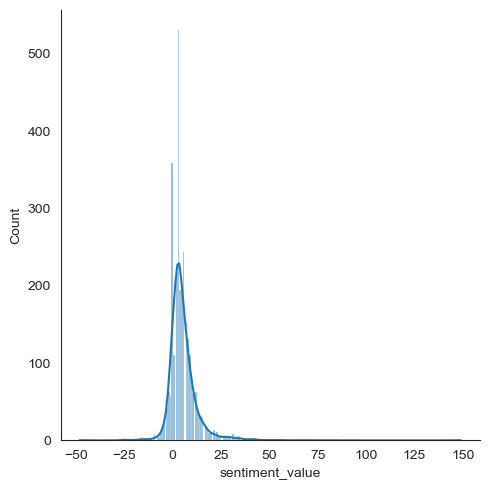

In [52]:
sns.set_style(style='white') 
sns.displot(videoGames['sentiment_value'],kde=True)
plt.show()

In [53]:
videoGames['index']=range(0,len(videoGames))

In [54]:
videoGames['word_count'] = videoGames['reviewText'].str.split().apply(len)

<Axes: xlabel='index', ylabel='sentiment_value'>

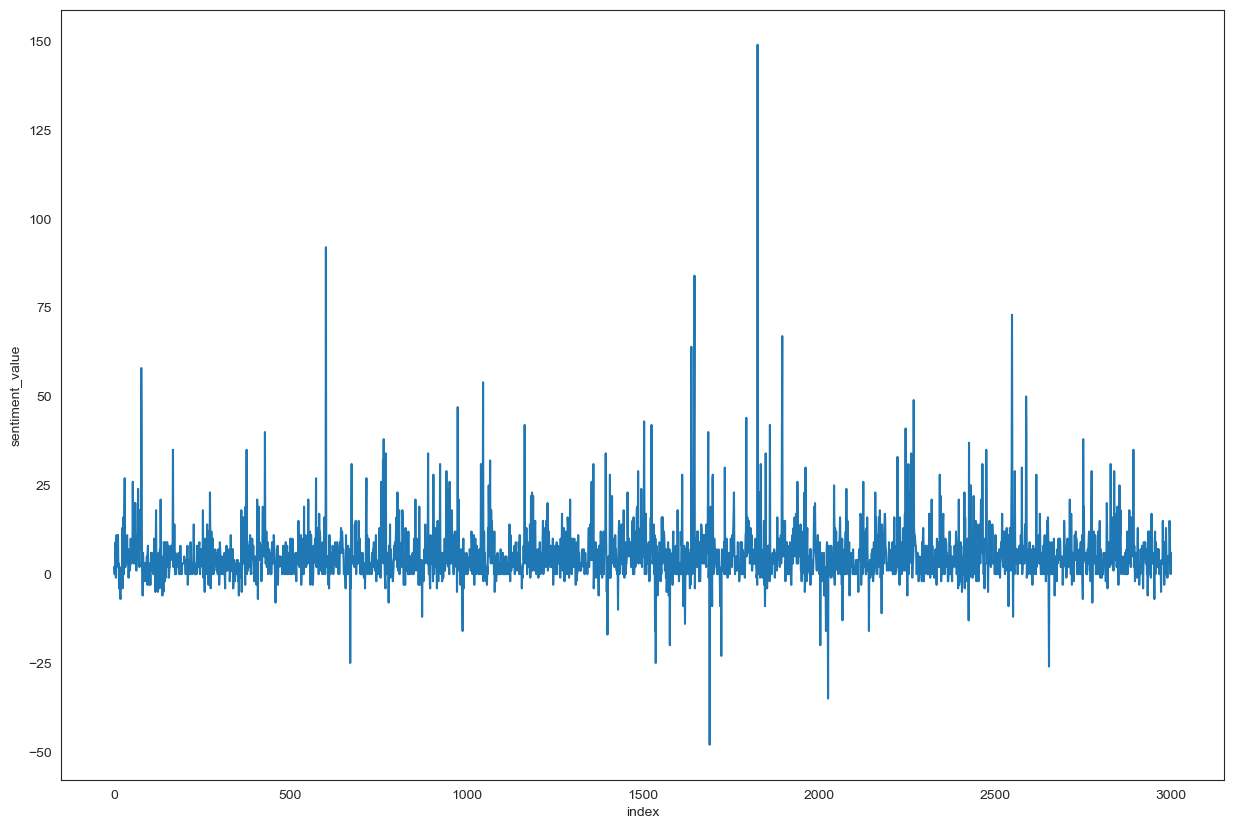

In [55]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=videoGames)

From this plot we can visualize the behaviour of sentiment values across the data, with highest and lowest spikes being the reviews having the highest and the lowest sentimental values of all the other reviews.

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

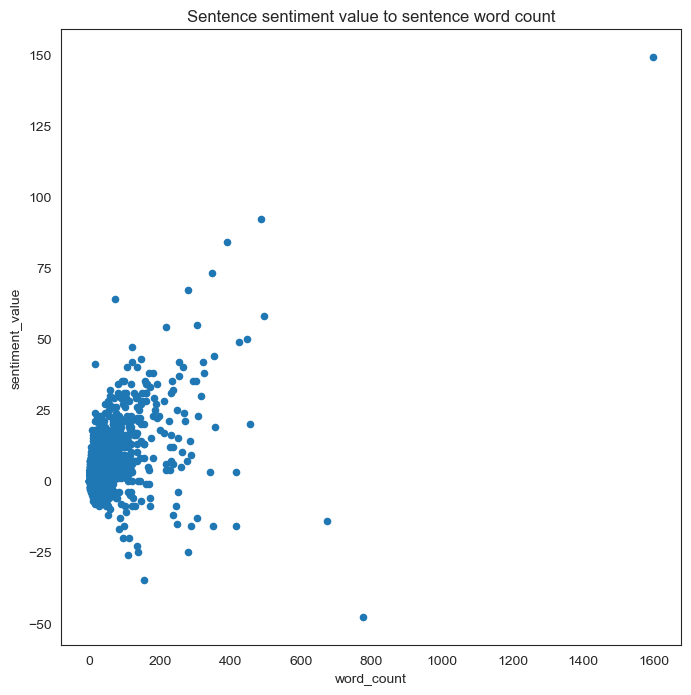

In [56]:
videoGames.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

From this plot we can see that most of the reviews were having words less than 200 per review. 